# check Langleys

In [1]:
import atmPy.radiation.retrievals.langley_calibration as atmlc
import atmPy.radiation.retrievals.spectral_irradiance as atmspec
import atmPy.aerosols.physics.column_optical_properties as atmcop
import helpers

In [2]:
reload(atmspec)
reload(atmspec.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

## 648

sh: 1: getfattr: not found
sh: 1: getfattr: not found
sh: 1: getfattr: not found
sh: 1: getfattr: not found
sh: 1: getfattr: not found
sh: 1: getfattr: not found
sh: 1: getfattr: not found


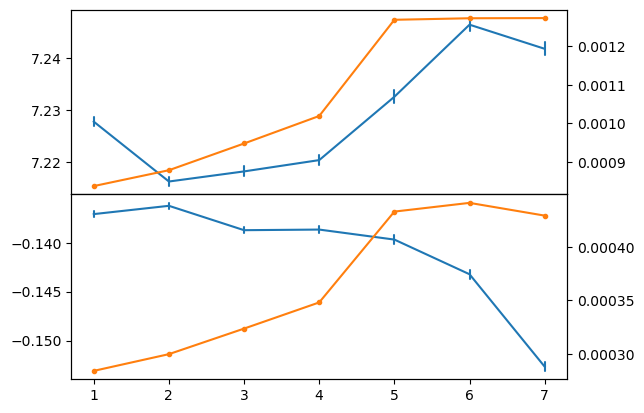

In [96]:
p2fld = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/')

lt = atmlc.open_langleys(p2fld)

lt.plot_ranked(wl = 500)

lt_pre_648 = lt

In [114]:
ds = lt.dataset.sortby('datetime')
ds

<xarray.Dataset> Size: 1MB
Dimensions:                            (datetime: 7, airmass: 1598,
                                        wavelength: 6, fit_results: 5)
Coordinates:
  * datetime                           (datetime) datetime64[ns] 56B 2025-09-...
  * airmass                            (airmass) float64 13kB 2.5 2.5 ... 4.697
  * wavelength                         (wavelength) int64 48B 415 500 ... 1625
  * fit_results                        (fit_results) <U16 320B 'slope' ... 'r...
Data variables:
    langleys                           (datetime, airmass, wavelength) float64 537kB ...
    langley_fit_residual               (datetime, airmass, wavelength) float64 537kB ...
    langley_fitres                     (datetime, wavelength, fit_results) float64 2kB ...
    langley_residual_correlation_prop  (datetime) float64 56B 0.05233 ... 0.386
    sp02_serial_no                     (datetime) <U4 112B 'BF4F' ... 'C8C1'
    ampm                               (datetime) <U2 56B 'am' 'am' ... 'pm'
    ranked                             (datetime) float64 56B 6.0 7.0 ... 4.0
Attributes:
    when:     am
    date:     20250928

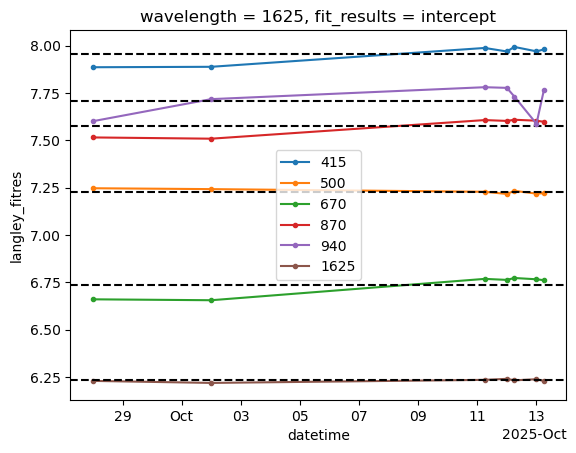

In [119]:
f,a = plt.subplots()
for wl in ds.wavelength:
    ds.langley_fitres.sel(fit_results = 'intercept', wavelength = wl).plot.line(x = 'datetime', marker = '.', label = str(int(wl)), ax = a)
    g = a.get_lines()[-1]
    a.axhline(ds.langley_fitres.sel(fit_results = 'intercept', wavelength = wl).mean(), color = 'black', ls = '--')
    
a.legend()

In [122]:
ds.langley_fitres.sel(fit_results = 'intercept').mean('datetime')

<xarray.DataArray 'langley_fitres' (wavelength: 6)> Size: 48B
array([7.9527588 , 7.2290283 , 6.73498383, 7.57703982, 7.70792935,
       6.23171339])
Coordinates:
  * wavelength   (wavelength) int64 48B 415 500 670 870 940 1625
    fit_results  <U16 64B 'intercept'

In [123]:
ds.langley_fitres.sel(fit_results = 'intercept').std('datetime')

<xarray.DataArray 'langley_fitres' (wavelength: 6)> Size: 48B
array([0.04272886, 0.010926  , 0.04909387, 0.04169046, 0.07536538,
       0.00663095])
Coordinates:
  * wavelength   (wavelength) int64 48B 415 500 670 870 940 1625
    fit_results  <U16 64B 'intercept'

In [125]:
lt.V0_simple

<xarray.Dataset> Size: 192B
Dimensions:     (wavelength: 6)
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
Data variables:
    V0          (wavelength) float64 48B 7.953 7.229 6.735 7.577 7.708 6.232
    V0_std      (wavelength) float64 48B 0.04273 0.01093 ... 0.07537 0.006631
    V0_stderr   (wavelength) float64 48B 0.001052 0.001071 ... 0.003459 0.001557

In [126]:
lt.V0_simple.V0_std/lt.V0_simple.V0

<xarray.DataArray (wavelength: 6)> Size: 48B
array([0.00537283, 0.00151141, 0.00728938, 0.00550221, 0.00977764,
       0.00106407])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625

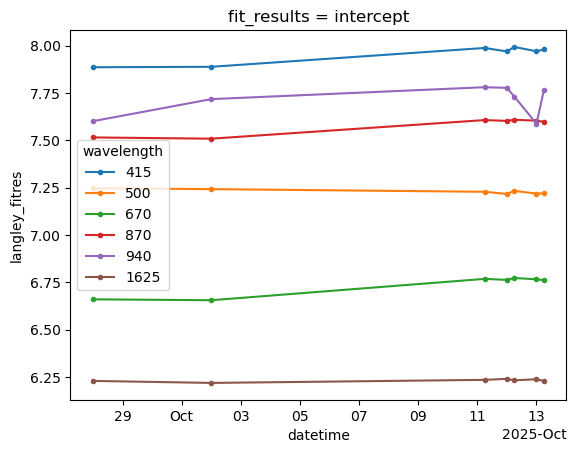

In [105]:
lt.dataset.sortby('datetime').langley_fitres.sel(fit_results = 'intercept').plot.line(x = 'datetime', marker = '.')

## 649

In [4]:
reload(atmlc)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/home/hagen/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

<xarray.Dataset> Size: 168B
Dimensions:     (wavelength: 6)
Coordinates:
  * wavelength  (wavelength) int32 24B 415 500 670 870 940 1625
Data variables:
    V0          (wavelength) float64 48B 7.988 7.233 6.776 7.615 7.787 6.255
    V0_std      (wavelength) float64 48B 0.003772 0.0007407 ... 0.05823 0.006433
    V0_stderr   (wavelength) float64 48B 0.001153 0.001047 ... 0.001746 0.001725

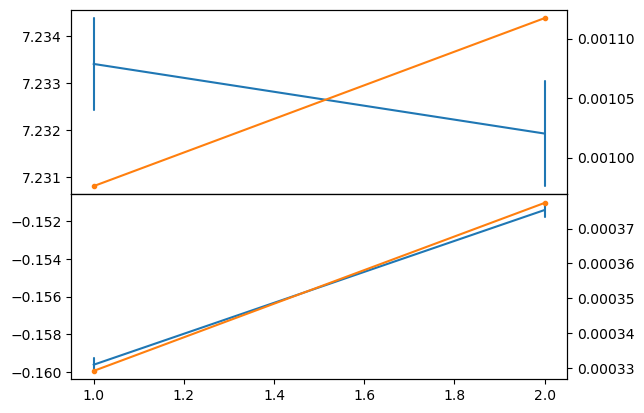

In [5]:
p2fld = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.2/')

lt = atmlc.open_langleys(p2fld)

lt.plot_ranked(wl = 500)
lt_pre_649 = lt
lt.V0_simple

# create Langles

In [6]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspir

In [7]:
version = '0.3'
"""
changes
-------
0.3
- use cloud screening for cleaning
- removed 940 nm channel in langley cleaning!
0.2
- langleys out to 5 atm
"""
p2fld_lang = '/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.langleys/v{version}'

## 648

In [8]:
version_in = '0.1' # this is the version of the mfrsr calibrated data
serialno = 648
lt = lt_pre_648
p2fld = pl.Path(f'/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.cal/v{version_in}/')

In [9]:
p2flist = list(p2fld.glob('*'))
p2flist.sort()

In [10]:
p2flist

[PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250924.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250925.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250926.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250927.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250929.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250930.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251001.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251002.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251003.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/

### 20251013

In [78]:
%matplotlib inline

In [79]:
date = '1013'
p2f = pl.Path(f'/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

sh: 1: getfattr: not found


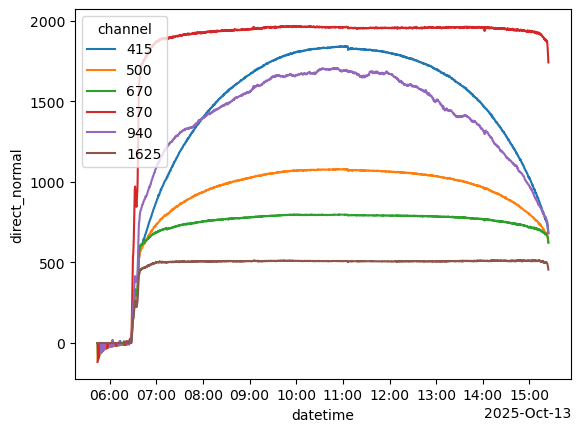

In [80]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [81]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [82]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                       )

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
sh: 1: getfattr: not found
sh: 1: getfattr: not found
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Dis

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

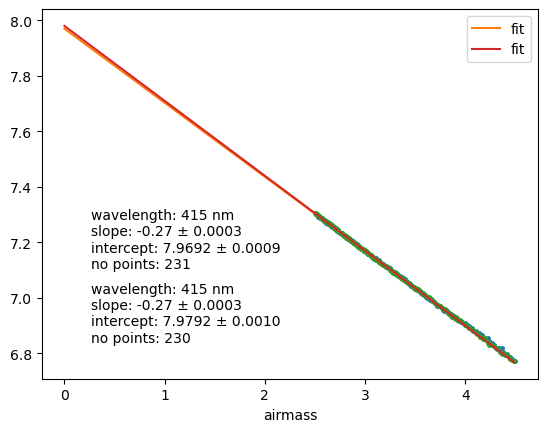

In [84]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

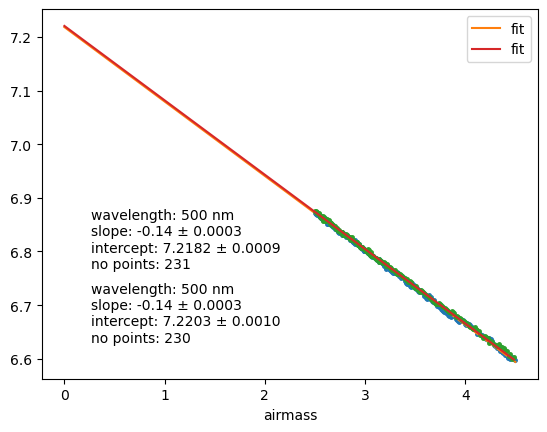

In [85]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

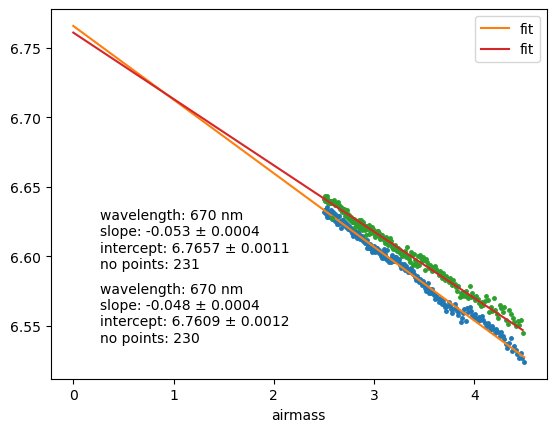

In [86]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

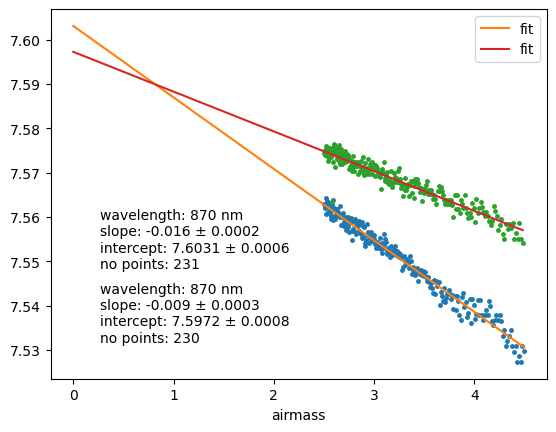

In [87]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

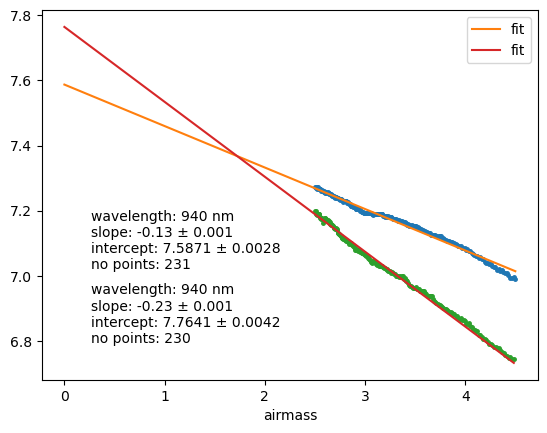

In [89]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

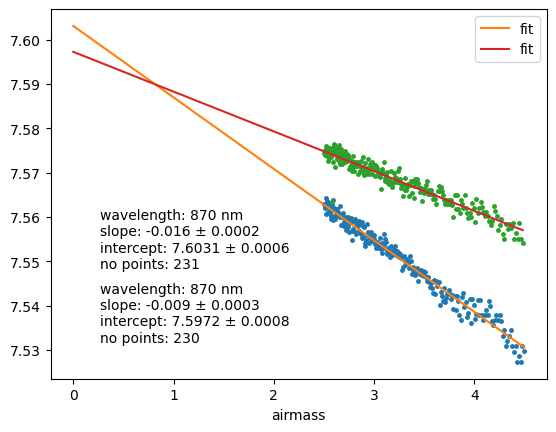

In [91]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

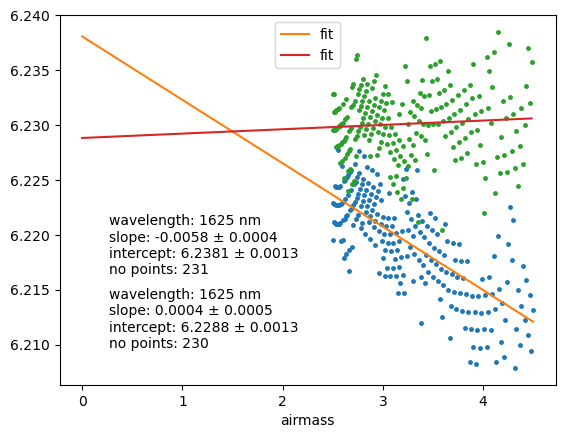

In [92]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [93]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_649_v0.1_20251013.nc')

In [94]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_pm_frc_649_v0.1_20251013.nc')

### 20251012

In [191]:
%matplotlib inline

In [56]:
date = '1012'
p2f = pl.Path(f'/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

sh: 1: getfattr: not found


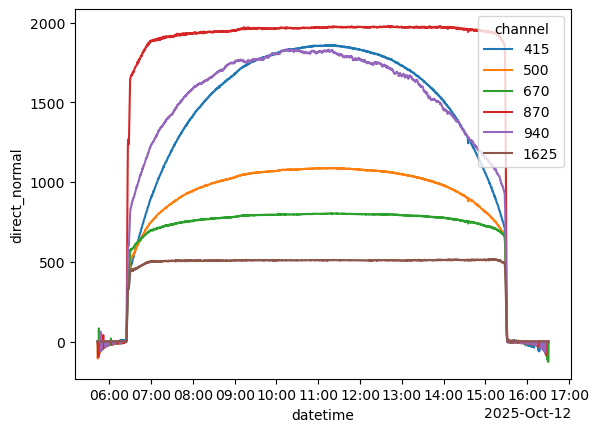

In [57]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [69]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [70]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt,     
                                        langley_airmass_limits=(2.5, 4.5),
                                       )

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
sh: 1: getfattr: not found
sh: 1: getfattr: not found
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Dis

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

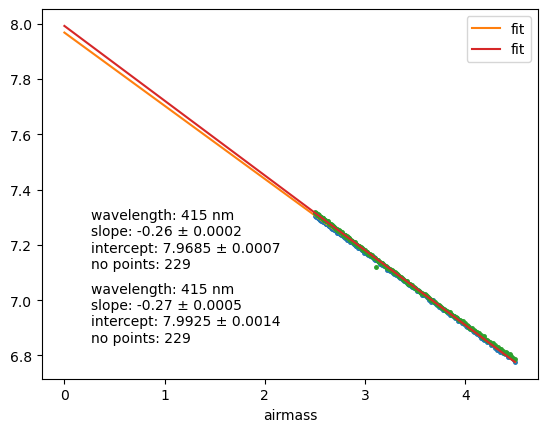

In [71]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

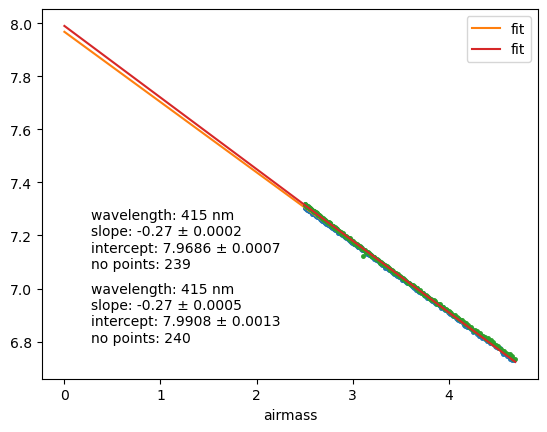

In [60]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

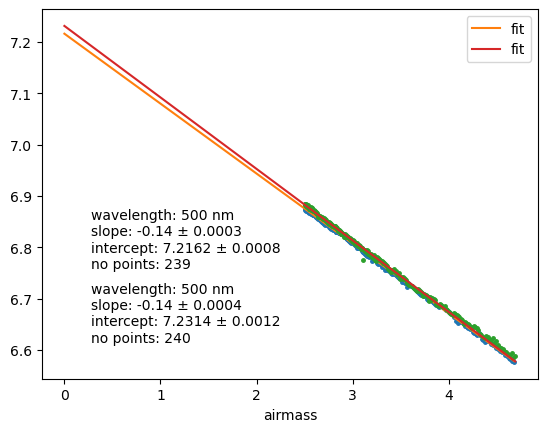

In [61]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

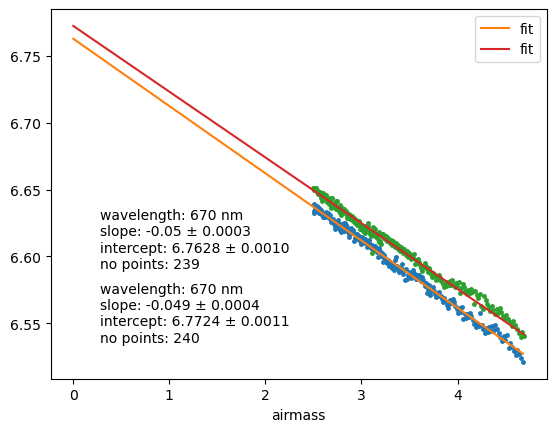

In [62]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

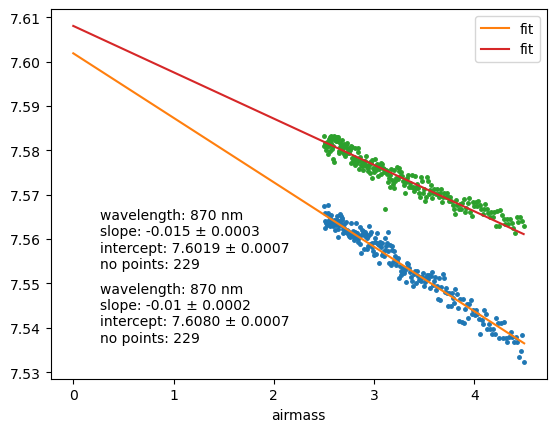

In [72]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

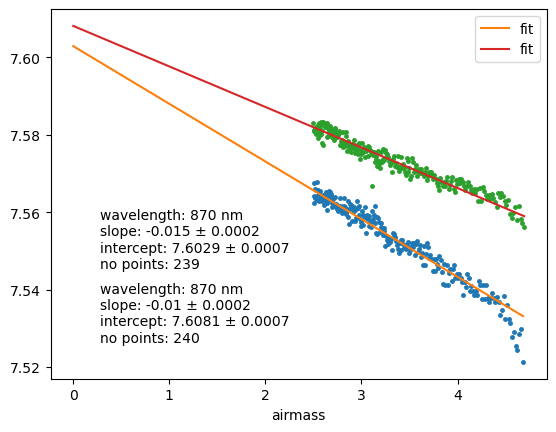

In [63]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

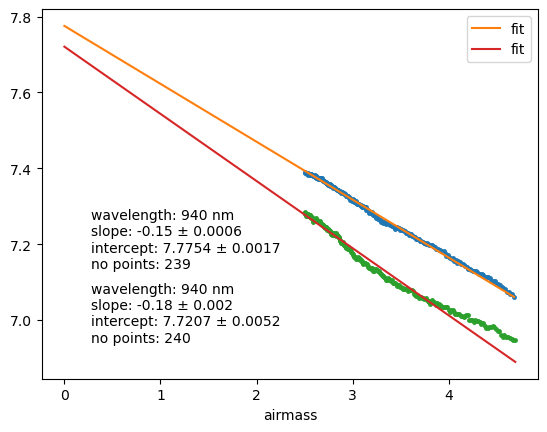

In [64]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

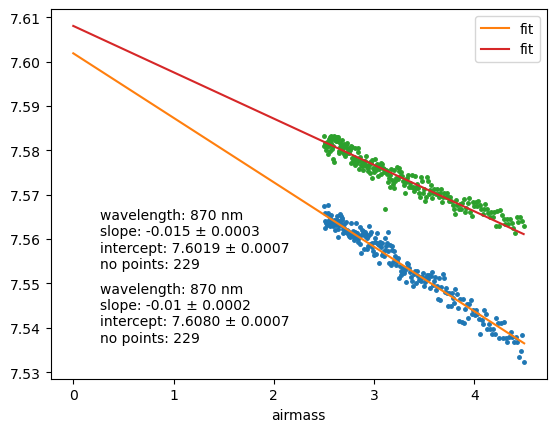

In [74]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

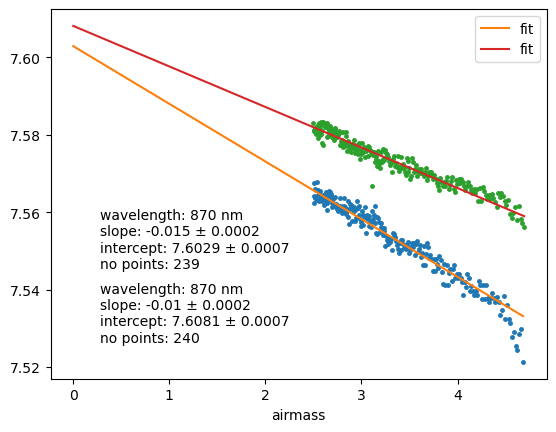

In [65]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

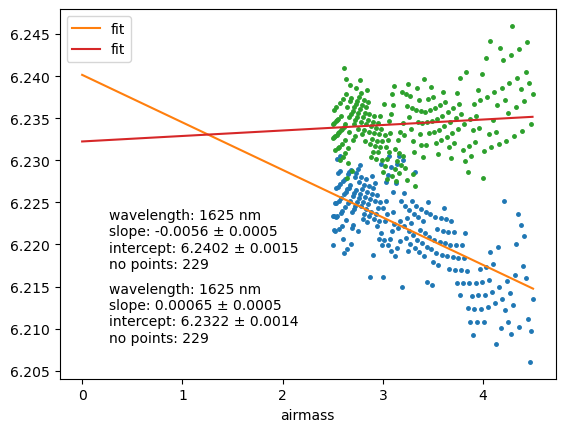

In [75]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

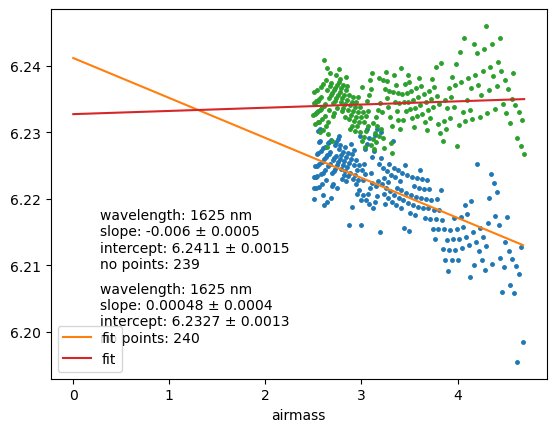

In [66]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [76]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_649_v0.1_20251012.nc')

In [77]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_pm_frc_649_v0.1_20251012.nc')

### 20251011

In [191]:
%matplotlib inline

In [38]:
date = '1011'
p2f = pl.Path(f'/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

sh: 1: getfattr: not found


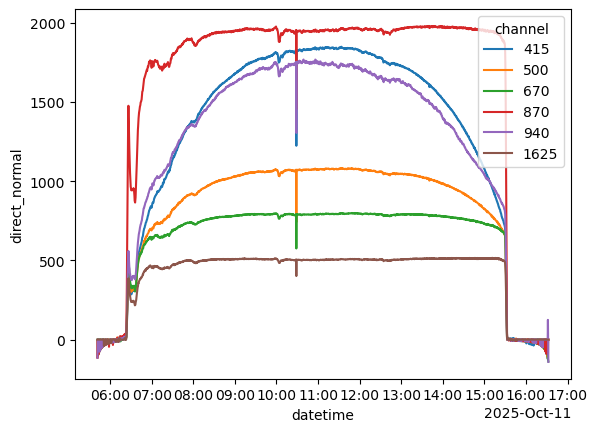

In [39]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [40]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [41]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
sh: 1: getfattr: not found
sh: 1: getfattr: not found
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Dis

In [49]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

TypeError: Langley.plot() got an unexpected keyword argument 'label'

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

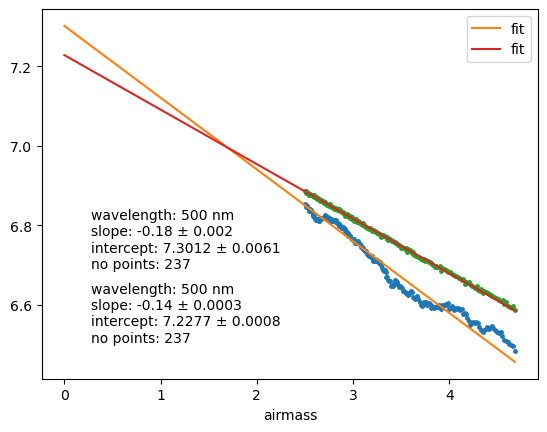

In [43]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

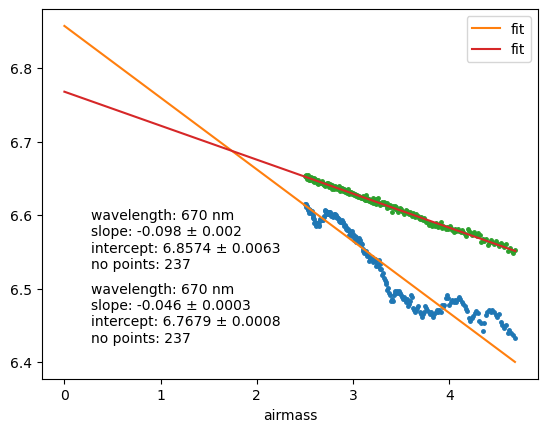

In [44]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

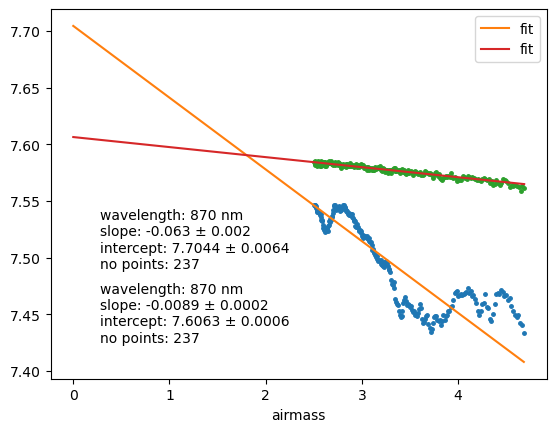

In [45]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

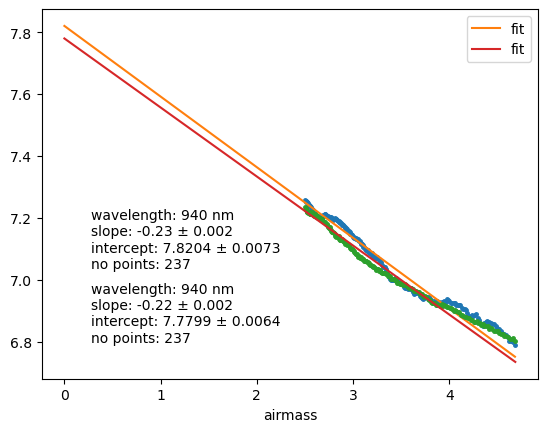

In [46]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

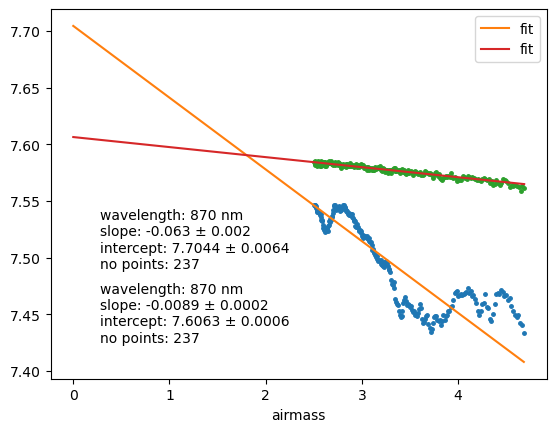

In [47]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

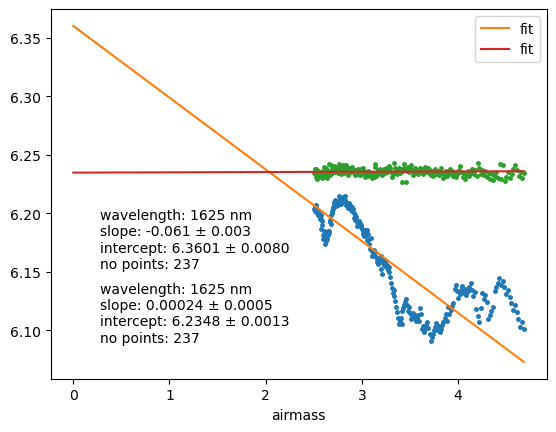

In [48]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [186]:
# lang = lang_am
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20250928.nc')

In [50]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_pm_frc_649_v0.1_20251011.nc')

### 20251002

In [33]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20251002.nc')
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251002_preliminary.nc'
lt = lt_pre_648

sh: 1: getfattr: not found


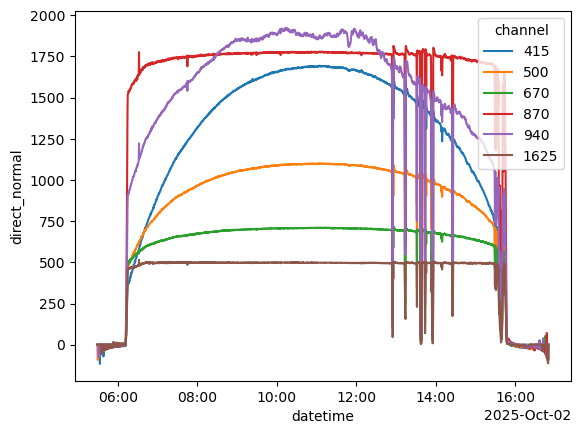

In [34]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [35]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [36]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
sh: 1: getfattr: not found
sh: 1: getfattr: not found
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Dis

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

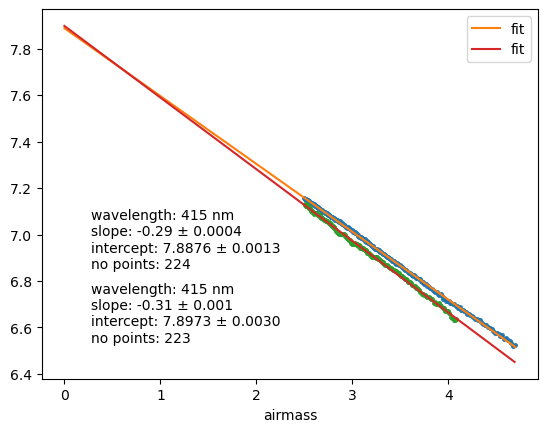

In [37]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

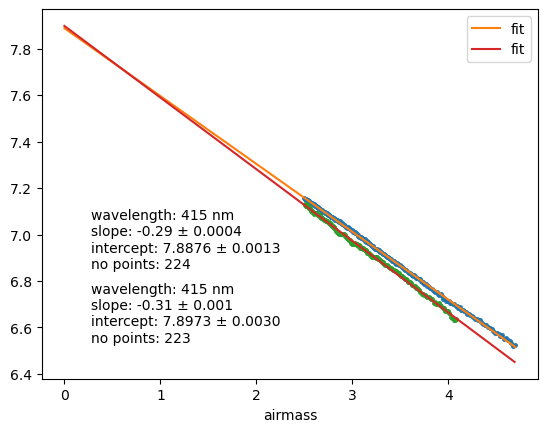

In [57]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

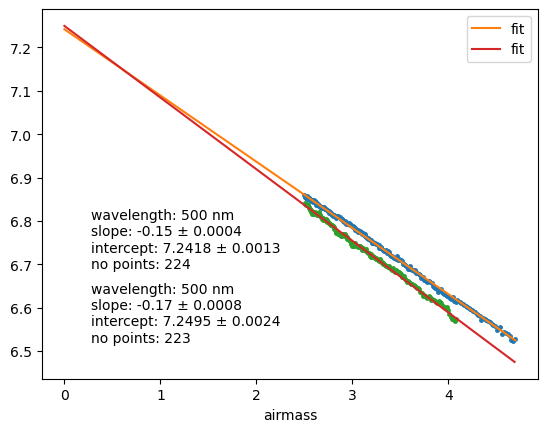

In [33]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

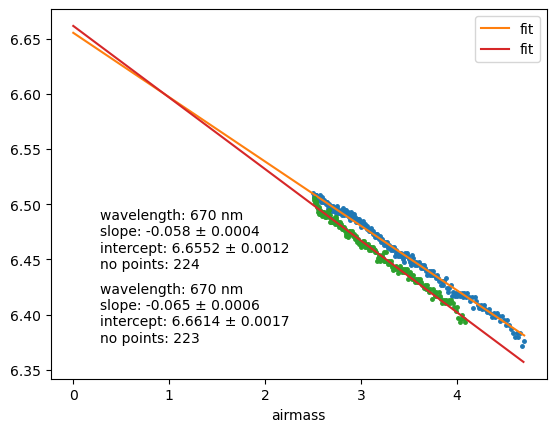

In [34]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

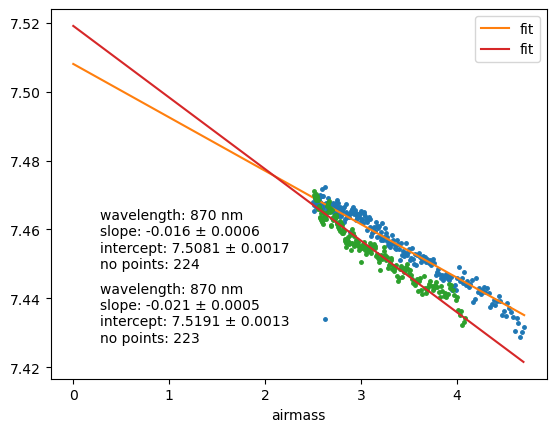

In [31]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

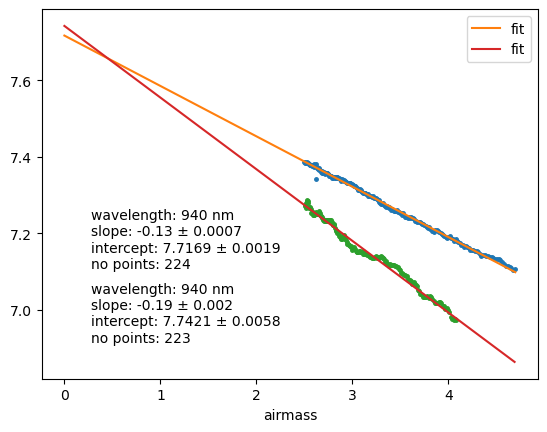

In [35]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

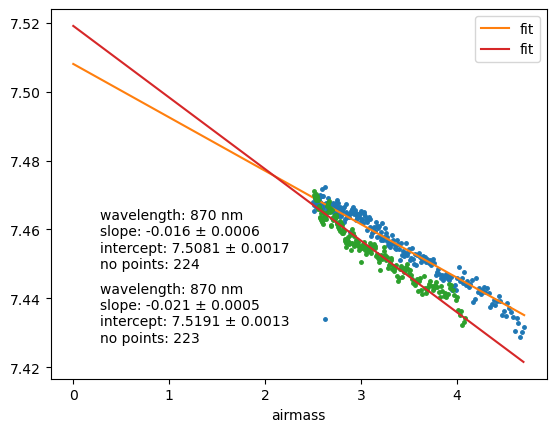

In [36]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

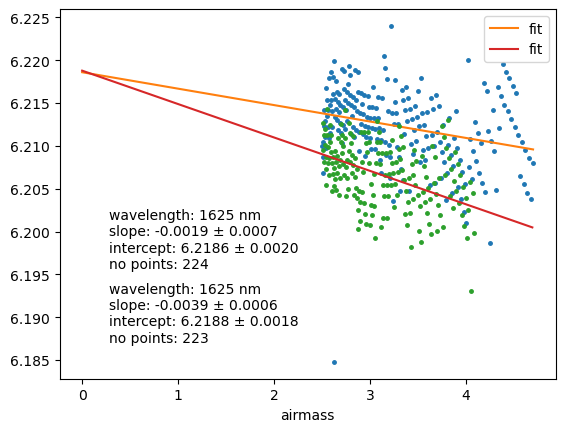

In [37]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [40]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20251002.nc')

In [41]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir()
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

### 20250929

In [323]:
%matplotlib inline

In [61]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250929.nc')
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250929_preliminary.nc'

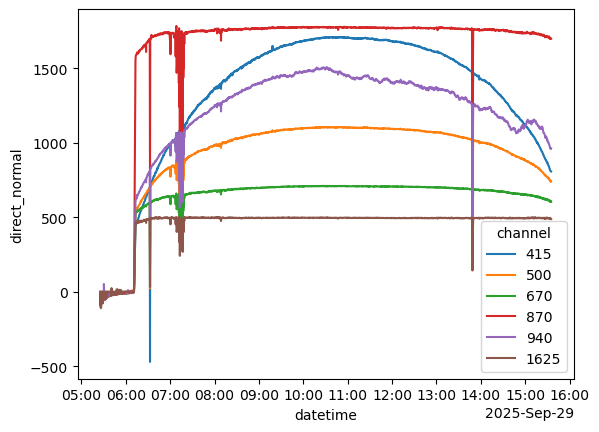

In [59]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [55]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [62]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = da

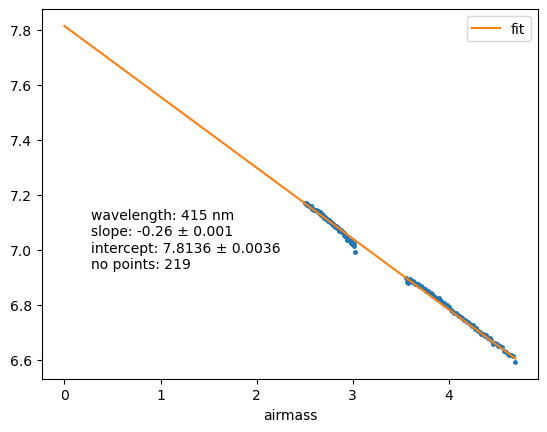

In [64]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

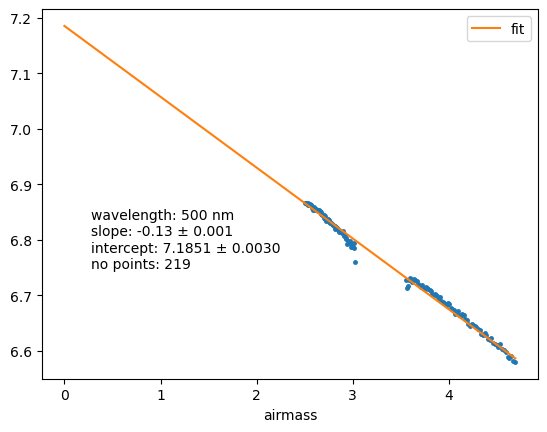

In [65]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

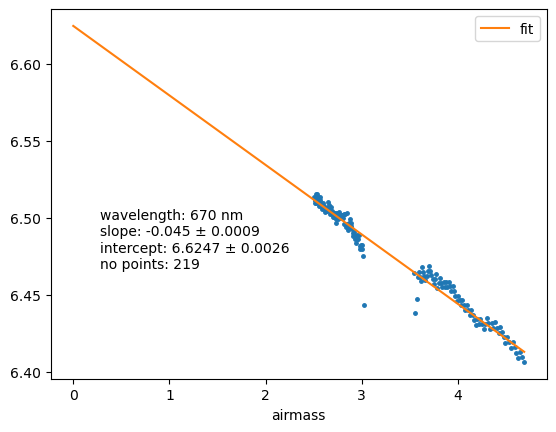

In [66]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

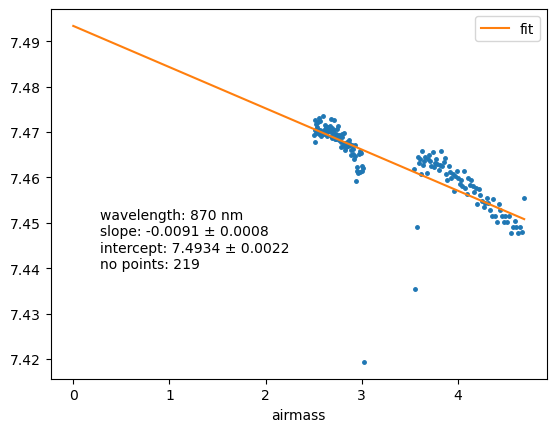

In [67]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

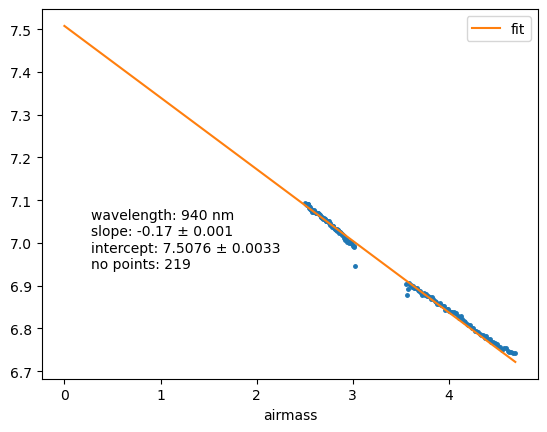

In [68]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

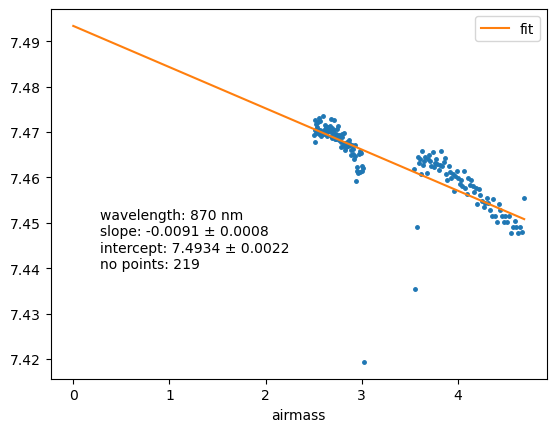

In [69]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

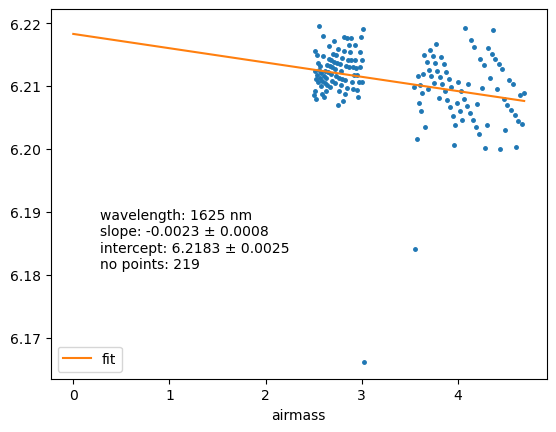

In [70]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [40]:
# lang = lang_am
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir()
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20251002.nc')

In [41]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir()
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

### 20250928

In [71]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.cal/v0.1/frc_648_v0.1_20250928.nc')
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250928_preliminary.nc'

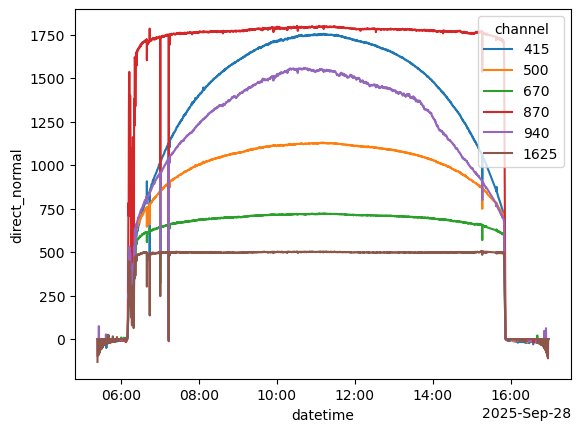

In [72]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [73]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [74]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = da

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

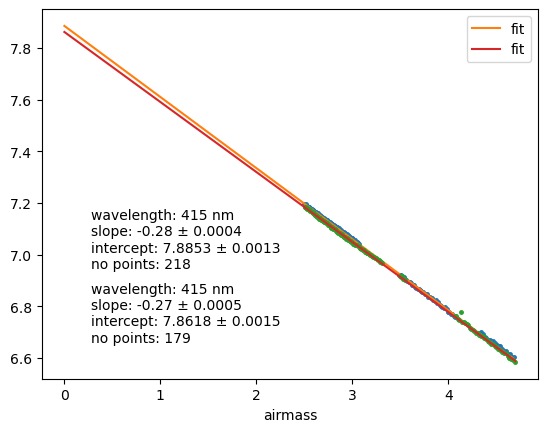

In [82]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

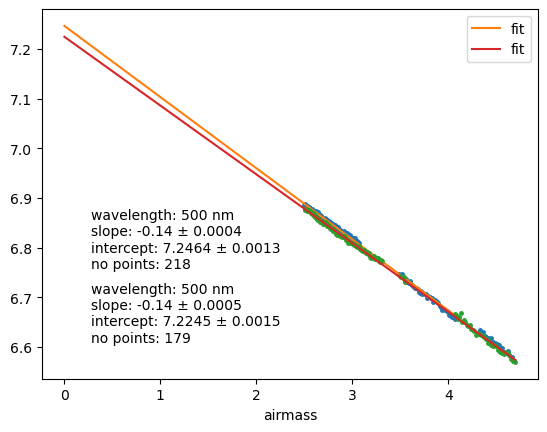

In [83]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

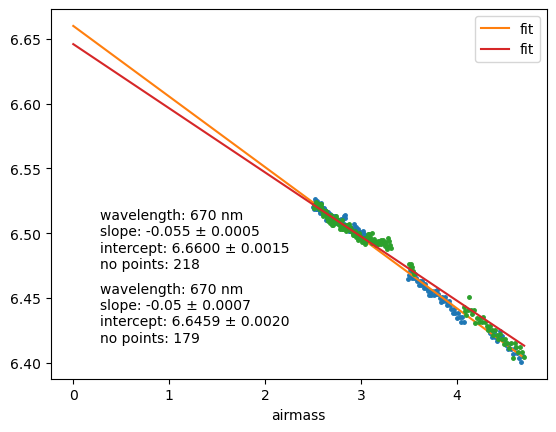

In [84]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

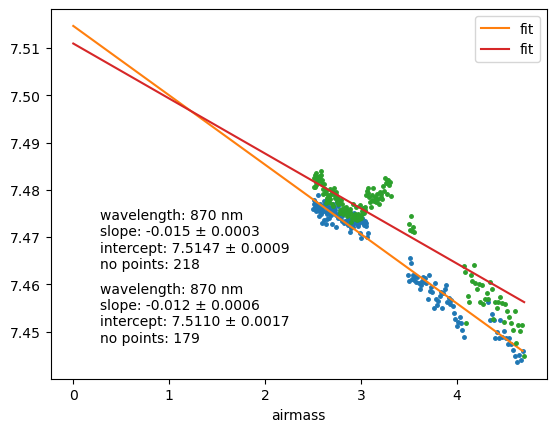

In [85]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

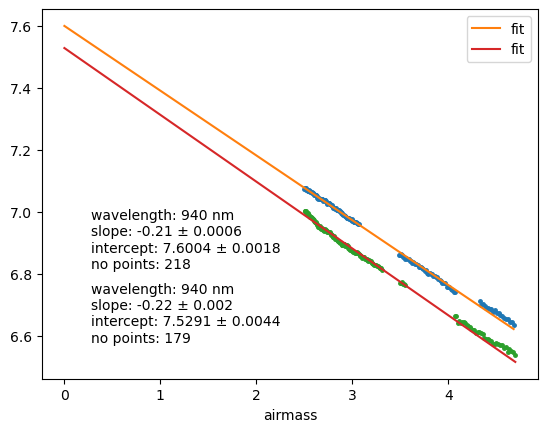

In [86]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

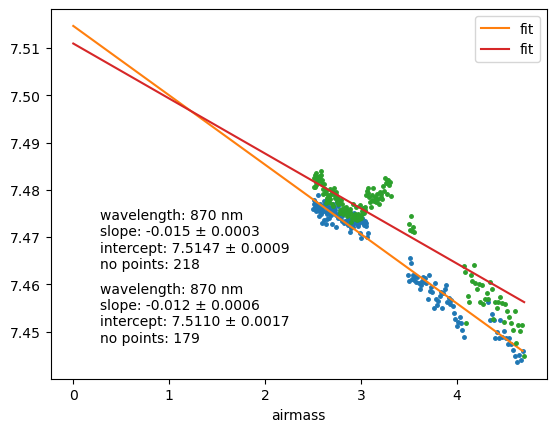

In [87]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

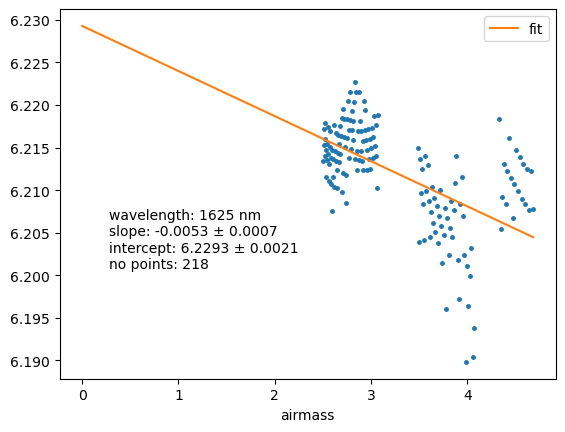

In [100]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [102]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20250928.nc')

In [41]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir()
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

## 649

In [103]:
serialno = 649
lt = lt_pre_649
p2fld = pl.Path(f'/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.cal/v{version_in}/')


In [104]:
p2flist = list(p2fld.glob('*'))
p2flist.sort()

In [105]:
p2flist

[PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250921.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250922.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250923.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250924.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250925.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250926.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250927.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250928.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250929.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250930.nc'),
 PosixPath('/nfs/grad/Inst/MFR/Campaign/

### 202510

In [ ]:
%matplotlib inline

In [71]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251003.nc')
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250928_preliminary.nc'

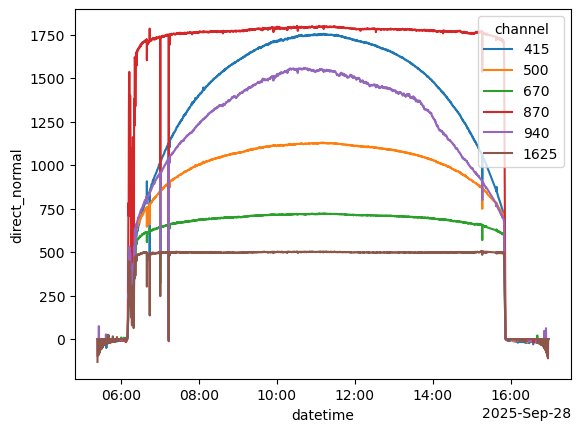

In [72]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [73]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [74]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = da

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

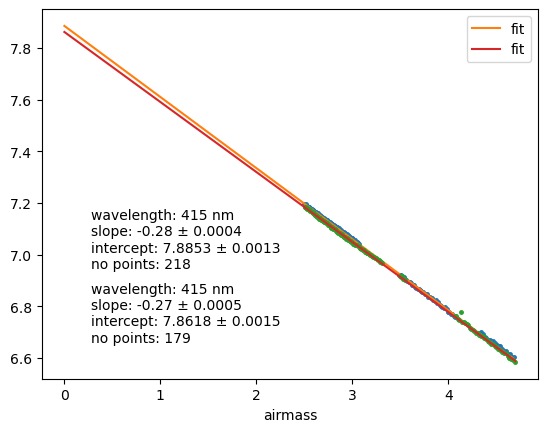

In [82]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

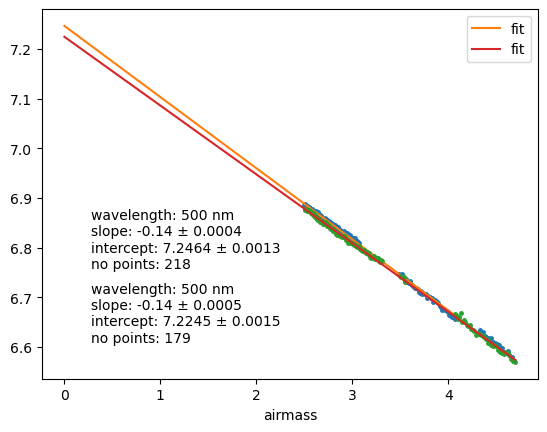

In [83]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

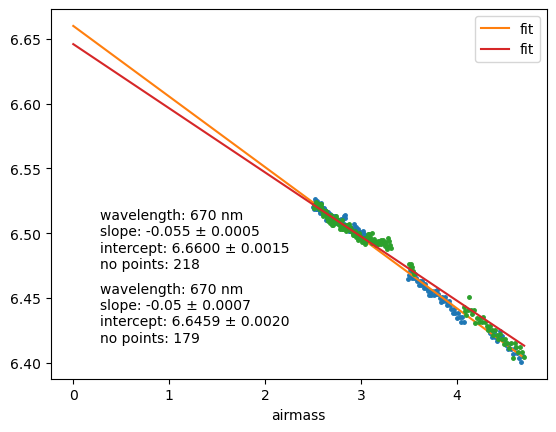

In [84]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

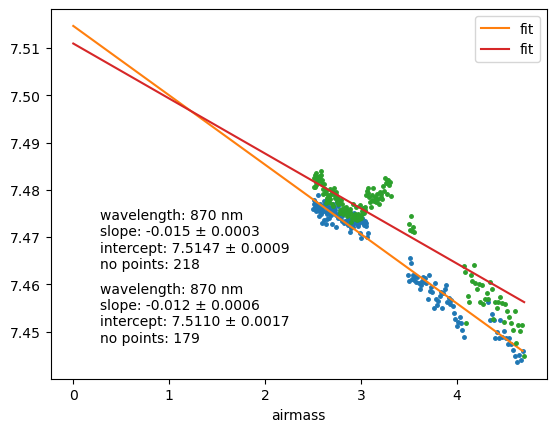

In [85]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

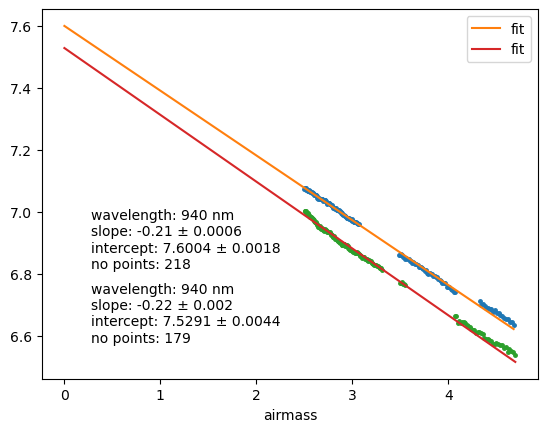

In [86]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

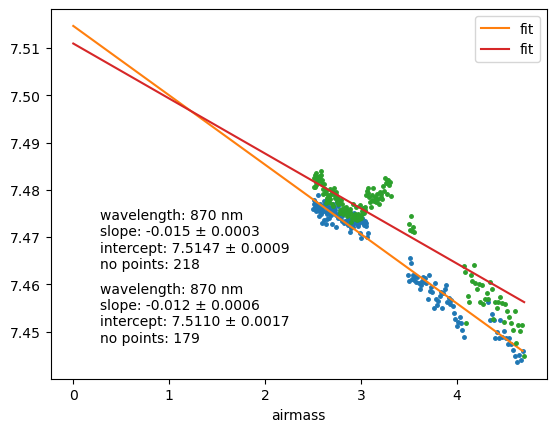

In [87]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

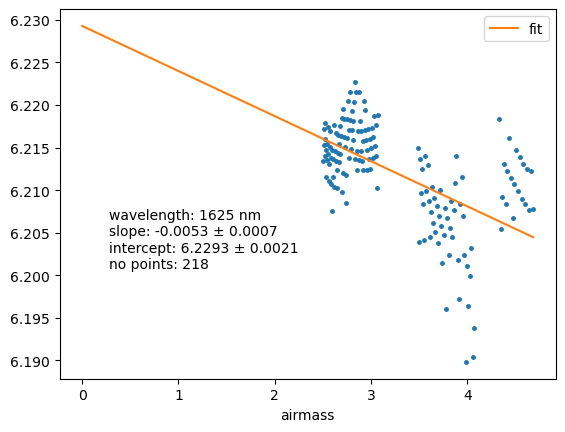

In [100]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [102]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/648.langleys/v0.3/langley_am_frc_648_v0.1_20250928.nc')

In [41]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir()
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

### 20251002

In [75]:
%matplotlib inline

In [106]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251002.nc')
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251002_preliminary.nc'

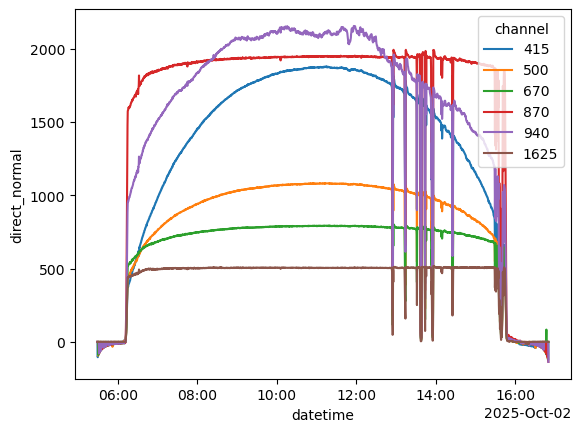

In [107]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [108]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [109]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = da

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

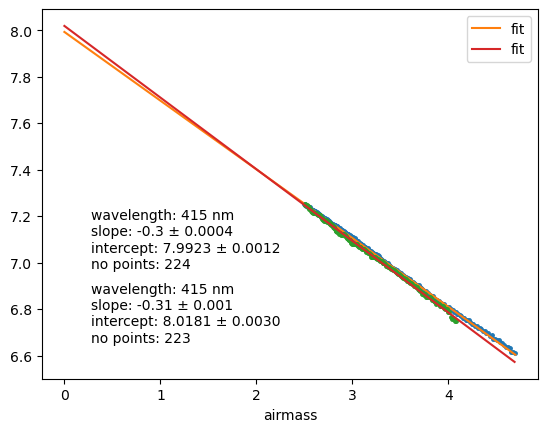

In [110]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

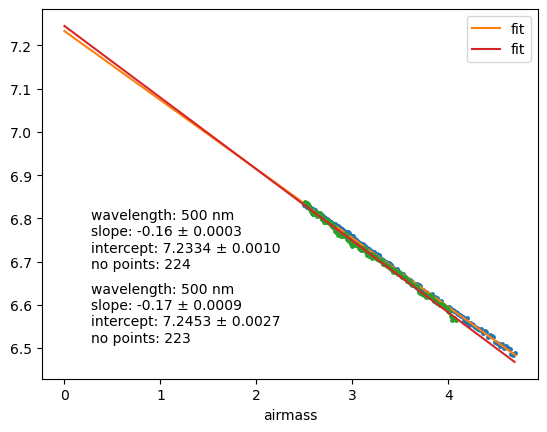

In [111]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

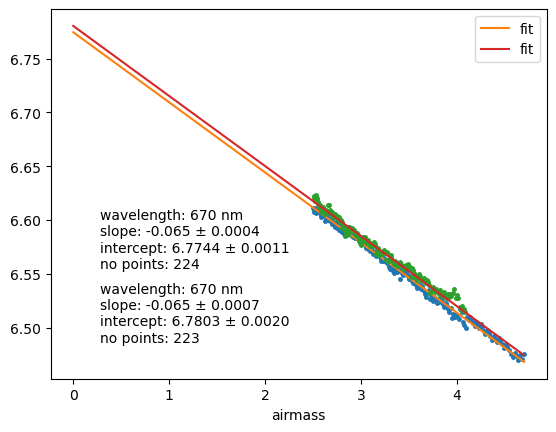

In [112]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

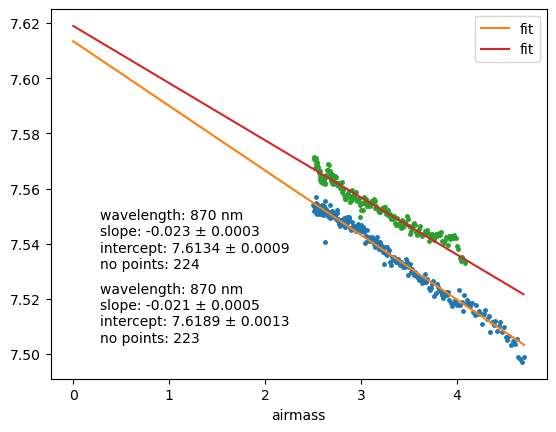

In [113]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

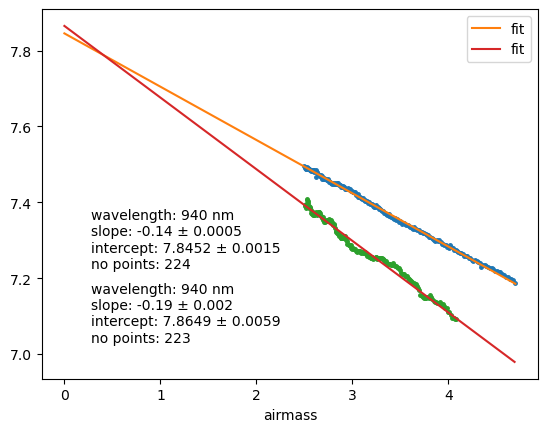

In [114]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

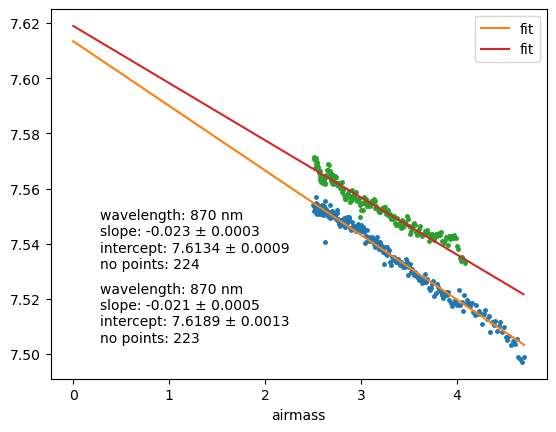

In [115]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

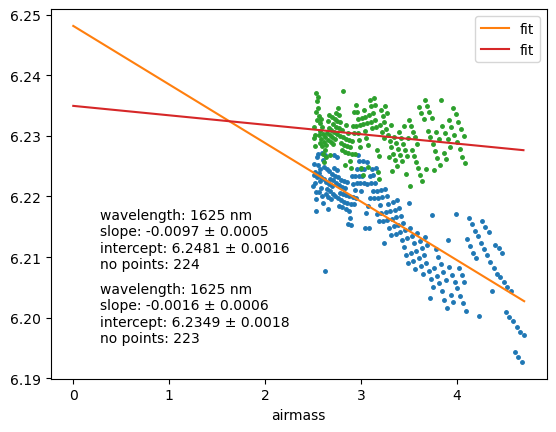

In [117]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [118]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20251002.nc')

In [120]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_pm_frc_649_v0.1_20251002.nc')

### 20250929

* met data is short!!

In [88]:
%matplotlib inline

In [121]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250929.nc')
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250929_preliminary.nc'

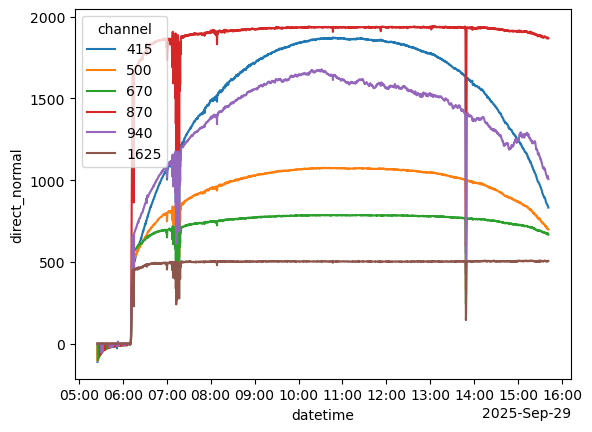

In [122]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [158]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [124]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = da

In [140]:
lang_pm.langleys.dropna()

Empty DataFrame
Columns: [415, 500, 670, 870, 940, 1625]
Index: []

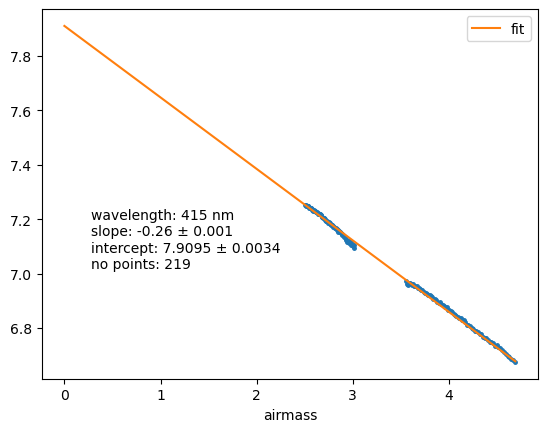

In [141]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

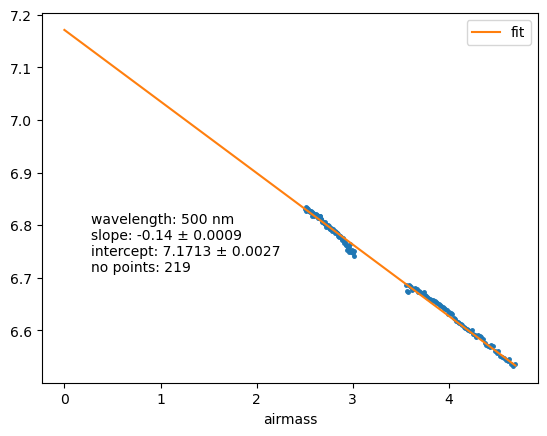

In [166]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

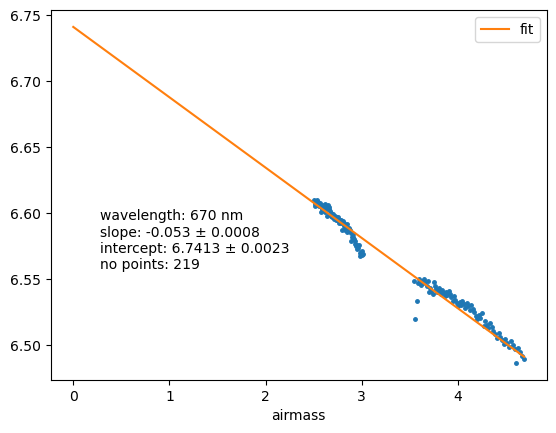

In [128]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

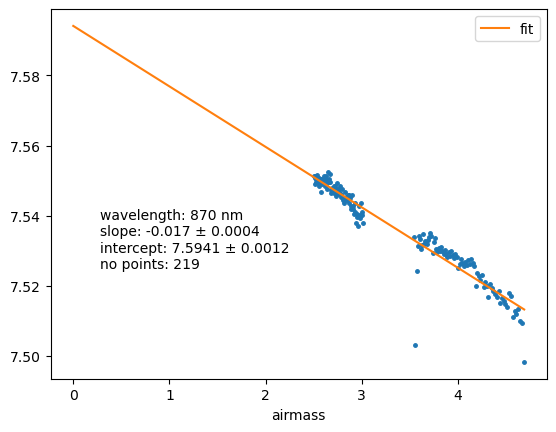

In [129]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

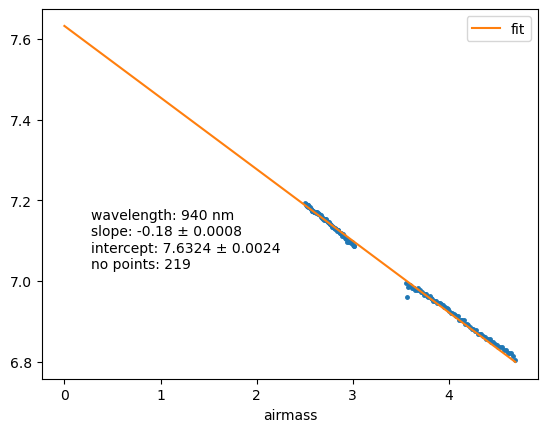

In [130]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

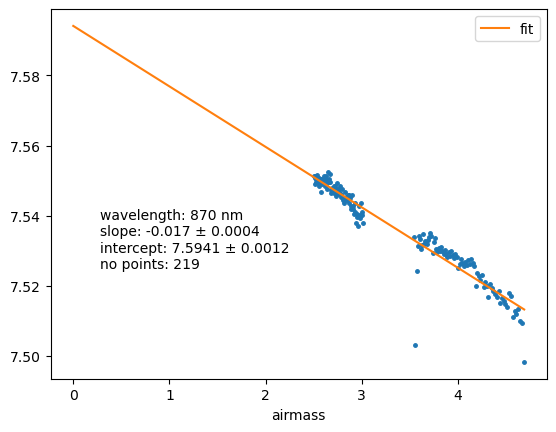

In [131]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

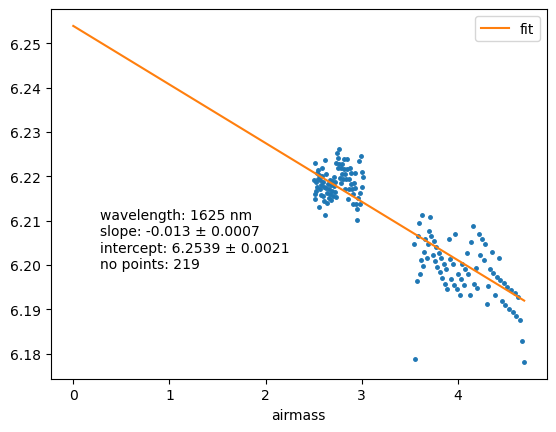

In [132]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [167]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

File exist!!!


PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20250929.nc')

In [134]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

### 20250928

In [168]:
p2f = pl.Path('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250928.nc')
fnmet = '/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250928_preliminary.nc'

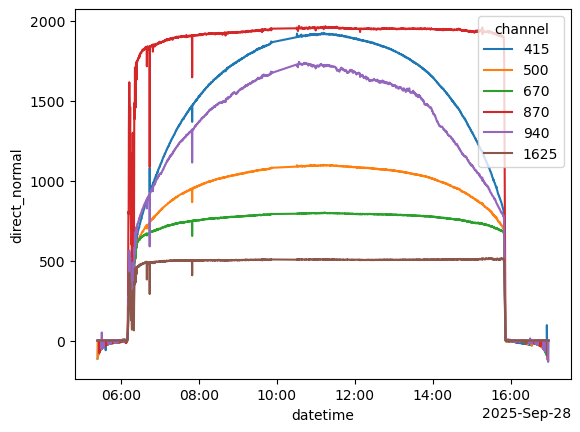

In [169]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [170]:
reload(helpers)

<module 'helpers' from '/home/hagen/projecte/cmpaign_2025_PMOD/helpers.py'>

In [171]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt)

/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = date.to_pydatetime()
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/hagen/programms/anaconda3/envs/py312/lib/python3.12/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \
/home/hagen/prog/atm-py/atmPy/radiation/solar.py:125: UserWarning: Discarding nonzero nanoseconds in conversion.
  date = da

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

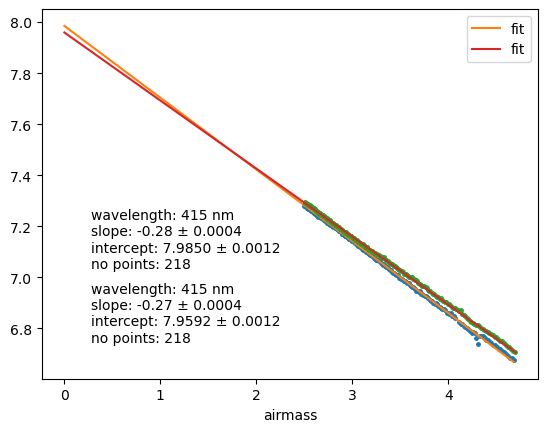

In [179]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

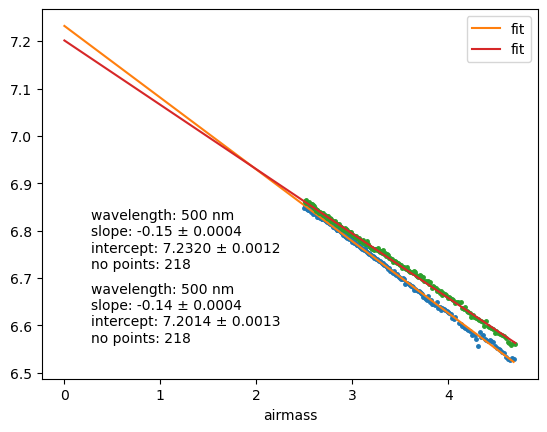

In [180]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

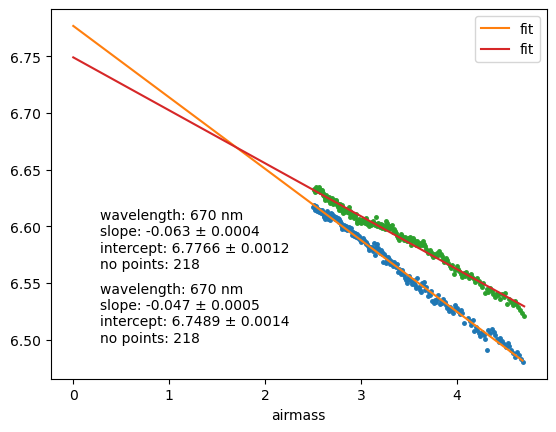

In [181]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

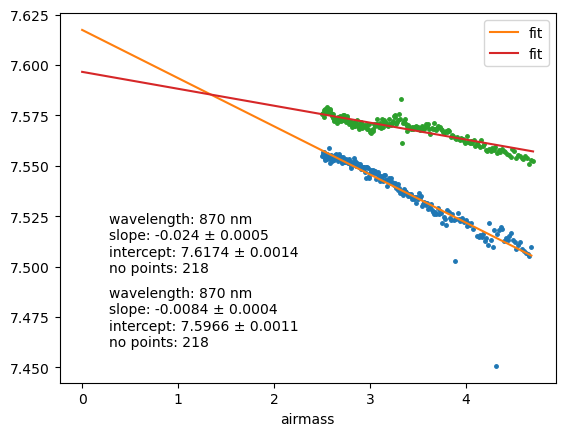

In [182]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

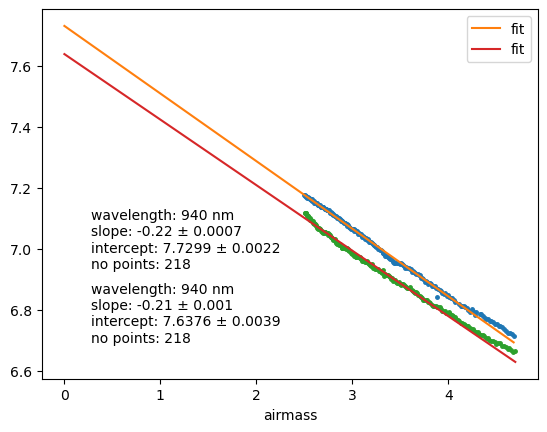

In [183]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

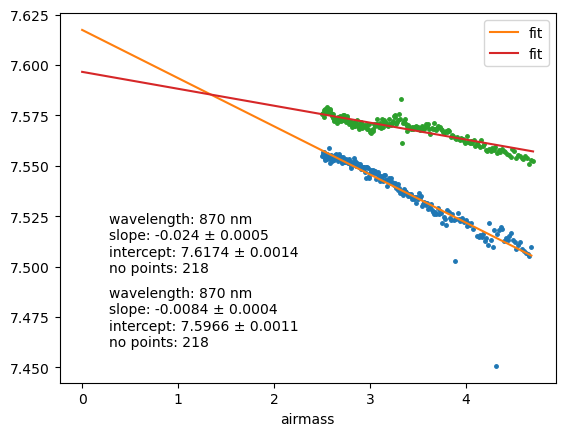

In [184]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

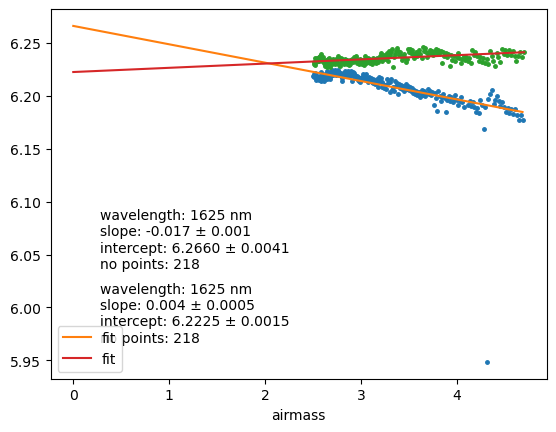

In [185]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [186]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_am_frc_649_v0.1_20250928.nc')

In [187]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.3/langley_pm_frc_649_v0.1_20250928.nc')